In [ ]:
#Assignment 3
#Author: Callis, Suzi 
#Date: 09/05/2025

In [ ]:
#Question 1
#Function 1 works because it contains {{column}} instead of (column). The {{column}} reads column as a column name not as a string, therefore seeing type as a column in data.
#Function 2 does not work because (column) is read as a variable named column which does not exist. 

In [ ]:
#Question 2
cd ~/Desktop/"UNC"/"BIOS 512"
git clone https://github.com/scallis24/CallisBIOS512.git
git status

In [ ]:
#Question 3 
#I used my exisiting key (id_ed25519) which is in my Github as "Mac Key"
ssh-add ~/.ssh/id_ed25519
git remote add origin git@github.com:scallis24/CallisBIOS512.git
git push -u origin main

In [ ]:
#Question 4
#a)
mkdir HW2
echo "This is for homework 2." > HW2/HW2.md
#b)
git add HW2/HW2.md
git status
#On branch main
#Your branch is up to date with 'origin/main'.
#Changes to be committed:
#  (use "git restore --staged <file>..." to unstage)
#	new file:   HW2/HW2.md
#c)
git commit -m "Add HW2.md for homework 2"
#d)
cat <<EOF > HW2/HW2.md
# HW 2
#This is for homework 2.
#EOF
#e)
#git diff
#diff --git a/HW2/HW2.md b/HW2/HW2.md
#index 1a010d3..f229136 100644
#--- a/HW2/HW2.md
#+++ b/HW2/HW2.md
#@@ -1 +1,3 @@
#+# HW 2
#+
# This is for homework 2.
#f)
git status
#On branch main
#Your branch is ahead of 'origin/main' by 1 commit.
#  (use "git push" to publish your local commits)

#Changes not staged for commit:
#  (use "git add <file>..." to update what will be committed)
#  (use "git restore <file>..." to discard changes in working directory)
#	modified:   HW2/HW2.md

#Untracked files:
#  (use "git add <file>..." to include in what will be committed)
#	HW2/.Rhistory

#no changes added to commit (use "git add" and/or "git commit -a")
#Suzis-MBP:CallisBIOS512 suzicallis$ 
#g)
git add HW2/HW2.md
git commit -m "Add title to HW2.md"
git log
#commit c1f23c4699ff3b1ca47d10ff2b62e0066af5c27e (HEAD -> main)
#Author: scallis24 <scallis@unc.edu>
#Date:   Fri Sep 5 17:37:53 2025 -0400

#    Add title to HW2.md

#commit 39a4e0280591b80d6bd3136311e80cc8e64702bd
#Author: scallis24 <scallis@unc.edu>
#Date:   Fri Sep 5 17:22:13 2025 -0400

#    Add HW2.md for homework 2

#commit ea58c8b208ebfb291d805745be8d5c6e959ccbad (origin/main, origin/HEAD)
#Author: scallis24 <scallis@unc.edu>
#Date:   Thu Sep 4 14:59:58 2025 -0400

#    Create Homework3.ipynp

#commit 6132de5754ba6871f0eb6c7e041887f6bfaba8f8
#Author: scallis24 <scallis@unc.edu>
#Date:   Thu Sep 4 14:59:20 2025 -0400

#    Add files via upload
#h)
git help
git help log 
git help show
#Description: --since=<date>, --after=<date> Show commits more recent than a specific date.

In [2]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.1
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
#Question 5
patient_names <- read_csv("patient_names.csv")
patient_properties <- read_csv("patient_properties.csv")

patient_names$BIRTHDATE <- as.Date(patient_names$BIRTHDATE, format = "%m/%d/%Y")
patient_names$DEATHDATE <- as.Date(patient_names$DEATHDATE, format = "%m/%d/%Y")

head(patient_names$BIRTHDATE, 10)
head(patient_names$DEATHDATE, 10)

Rows: 974 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ID, BIRTHDATE, DEATHDATE, FIRST, LAST, CITY, STATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3896 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ID, property, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "77-03-19" "40-02-19" "58-06-04" "28-12-25" "28-12-25" "28-12-25"
 [7] "57-11-08" "72-06-27" "54-03-06" "27-07-10"

[1] NA         NA         NA         "17-09-29" "14-02-23" NA        
 [7] NA         NA         NA         NA

In [7]:
#Question 6
patient_properties_wide <- patient_properties %>%
  pivot_wider(
    id_cols = ID,
    names_from = property,
    values_from = value,
    values_fn = ~ .x[1]
  )
mdpre(head(patient_properties_wide, 10))

# A tibble: 10 × 5
   ID                                   MARITAL RACE   ETHNICITY   GENDER
   <chr>                                <chr>   <chr>  <chr>       <chr> 
 1 5605b66b-e92d-c16c-1b83-b8bf7040d51f M       white  nonhispanic F     
 2 6e5ae27c-8038-7988-e2c0-25a103f01bfa M       white  nonhispanic M     
 3 8123d076-0886-9007-e956-d5864aa121a7 M       white  nonhispanic M     
 4 770518e4-6133-648e-60c9-071eb2f0e2ce M       white  hispanic    M     
 5 f96addf5-81b9-0aab-7855-d208d3d352c5 M       white  hispanic    M     
 6 8e9650d1-788a-78f9-4a28-d08f7f95354a M       white  hispanic    M     
 7 183df435-4190-060e-8f8e-bf63c572b266 M       asian  nonhispanic F     
 8 720560d4-51da-c38c-ee90-c15935278df1 M       white  nonhispanic M     
 9 217851b0-5f47-d376-18b9-0fe4ba77207e S       black  hispanic    M     
10 ff331e5c-ab16-e218-f39a-63e11de1ed75 M       native hispanic    M     


In [8]:
#Question 7
patient_full <- left_join(patient_names, patient_properties_wide, by = "ID")
mdpre(head(patient_full, 10))

# A tibble: 10 × 11
   ID      BIRTHDATE DEATHDATE FIRST   LAST  CITY  STATE MARITAL RACE  ETHNICITY
   <chr>   <date>    <date>    <chr>   <chr> <chr> <chr> <chr>   <chr> <chr>    
 1 5605b6… 77-03-19  NA        Nikita… Erdm… Quin… Mass… M       white nonhispa…
 2 6e5ae2… 40-02-19  NA        Zane918 Hodk… Bost… Mass… M       white nonhispa…
 3 8123d0… 58-06-04  NA        Quinn1… Marq… Quin… Mass… M       white nonhispa…
 4 770518… 28-12-25  17-09-29  Abel832 Smit… Bost… Mass… M       white hispanic 
 5 f96add… 28-12-25  14-02-23  Edwin7… Laba… Bost… Mass… M       white hispanic 
 6 8e9650… 28-12-25  NA        Franki… Ober… Bost… Mass… M       white hispanic 
 7 183df4… 57-11-08  NA        Eilene… Wals… Camb… Mass… M       asian nonhispa…
 8 720560… 72-06-27  NA        Lowell… Pric… Quin… Mass… M       white nonhispa…
 9 217851… 54-03-06  NA        Adrian… Glea… Bost… Mass… S       black hispanic 
10 ff331e… 27-07-10  NA        Eugene… Aber… Bost… Mass… M       nati… hispanic 
# ℹ 1 mo

In [9]:
#Question 8
simplify_strings <- function(s) {
  s %>%
    str_to_lower() %>%
    str_trim() %>%
    str_replace_all("[^a-z1-9]+", "_") %>%
    str_replace_all("^_+", "") %>%
    str_replace_all("_+$", "")
}
patient_full <- patient_full %>%
  mutate(
    FIRST = simplify_strings(iconv(str_replace_all(FIRST, "\\d+", ""), from = "UTF-8", to = "Windows-1252")),
    LAST  = simplify_strings(iconv(str_replace_all(LAST, "\\d+", ""), from = "UTF-8", to = "Windows-1252"))
  )
mdpre(head(patient_full, 10))

# A tibble: 10 × 11
   ID      BIRTHDATE DEATHDATE FIRST   LAST  CITY  STATE MARITAL RACE  ETHNICITY
   <chr>   <date>    <date>    <chr>   <chr> <chr> <chr> <chr>   <chr> <chr>    
 1 5605b6… 77-03-19  NA        nikita  erdm… Quin… Mass… M       white nonhispa…
 2 6e5ae2… 40-02-19  NA        zane    hodk… Bost… Mass… M       white nonhispa…
 3 8123d0… 58-06-04  NA        quinn   marq… Quin… Mass… M       white nonhispa…
 4 770518… 28-12-25  17-09-29  abel    smit… Bost… Mass… M       white hispanic 
 5 f96add… 28-12-25  14-02-23  edwin   laba… Bost… Mass… M       white hispanic 
 6 8e9650… 28-12-25  NA        frankie ober… Bost… Mass… M       white hispanic 
 7 183df4… 57-11-08  NA        eilene  walsh Camb… Mass… M       asian nonhispa…
 8 720560… 72-06-27  NA        lowell  price Quin… Mass… M       white nonhispa…
 9 217851… 54-03-06  NA        adrian  glea… Bost… Mass… S       black hispanic 
10 ff331e… 27-07-10  NA        eugene  aber… Bost… Mass… M       nati… hispanic 
# ℹ 1 mo

In [10]:
#Question 9 
cols_to_count <- c("CITY", "STATE", "MARITAL", "RACE", "ETHNICITY", "GENDER")

for (col in cols_to_count) {
  cat("\n###", col, "\n")
  
  counts <- patient_full %>%
    count(.data[[col]]) %>%
    arrange(desc(n))
  
  mdpre(counts)
}


### CITY 
# A tibble: 29 × 2
   CITY           n
   <chr>      <int>
 1 Boston       541
 2 Quincy        80
 3 Cambridge     45
 4 Revere        42
 5 Chelsea       39
 6 Weymouth      37
 7 Somerville    25
 8 Hingham       22
 9 Winthrop      22
10 Brookline     17
# ℹ 19 more rows

### STATE 
# A tibble: 1 × 2
  STATE             n
  <chr>         <int>
1 Massachusetts   974

### MARITAL 
# A tibble: 5 × 2
  MARITAL     n
  <chr>   <int>
1 M         782
2 S         189
3 Fine        1
4 male        1
5 NA          1

### RACE 
# A tibble: 7 × 2
  RACE         n
  <chr>    <int>
1 white      680
2 black      163
3 asian       90
4 other       16
5 hawaiian    13
6 native      11
7 asiann       1

### ETHNICITY 
# A tibble: 4 × 2
  ETHNICITY       n
  <chr>       <int>
1 nonhispanic   781
2 hispanic      190
3 nonhispani      2
4 hispani         1

### GENDER 
# A tibble: 5 × 2
  GENDER     n
  <chr>  <int>
1 M        493
2 F        478
3 Female     1
4 Male       1
5 female     1


In [11]:
#Question 10
non_erroneous_marital <- c("M", "S")
tidied_data <- patient_full %>%
  filter(MARITAL %in% non_erroneous_marital)

tidied_data <- tidied_data %>%
  mutate(RACE = ifelse(RACE == "asiann", "asian", RACE))

tidied_data <- tidied_data %>%
  mutate(ETHNICITY = case_when(
    ETHNICITY == "nonhispani" ~ "nonhispanic",
    ETHNICITY == "hispani" ~ "hispanic",
    ETHNICITY == "nonhispanic" ~ "nonhispanic",
    ETHNICITY == "hispanic" ~ "hispanic",
    TRUE ~ ETHNICITY
  ))

tidied_data <- tidied_data %>%
  mutate(GENDER = str_to_lower(GENDER)) %>%
  mutate(GENDER = case_when(
    GENDER %in% c("m", "male") ~ "male",
    GENDER %in% c("f", "female") ~ "female",
    TRUE ~ GENDER
  ))

fix_dates <- function(date_col) {
  parsed <- ymd(date_col)
  corrected <- if_else(year(parsed) > year(Sys.Date()), parsed %m-% years(100), parsed)
  return(corrected)
}

tidied_data <- tidied_data %>%
  mutate(
    BIRTHDATE = fix_dates(BIRTHDATE),
    DEATHDATE = fix_dates(DEATHDATE)
  )

tidied_data <- tidied_data %>%
  mutate(
    swap_needed = !is.na(DEATHDATE) & BIRTHDATE > DEATHDATE,
    
    new_birthdate = if_else(swap_needed, DEATHDATE, BIRTHDATE),
    new_deathdate = if_else(swap_needed, BIRTHDATE, DEATHDATE)
  ) %>%
  select(-swap_needed) %>%
  mutate(
    BIRTHDATE = new_birthdate,
    DEATHDATE = new_deathdate
  ) %>%
  select(-new_birthdate, -new_deathdate)

tidied_data <- tidied_data %>%
  drop_na()

mdpre(tidied_data %>% count(GENDER))
mdpre(tidied_data %>% count(ETHNICITY))
mdpre(tidied_data %>% count(RACE))
mdpre(tidied_data %>% count(MARITAL))

date_summary <- tibble(
     Column = c("BIRTHDATE", "DEATHDATE"),
     Start = c(
         format(min(tidied_data$BIRTHDATE), "%Y-%m-%d"),
         format(min(tidied_data$DEATHDATE), "%Y-%m-%d")
     ),
     End = c(
         format(max(tidied_data$BIRTHDATE), "%Y-%m-%d"),
         format(max(tidied_data$DEATHDATE), "%Y-%m-%d")
     )
 )
mdpre(date_summary)

# A tibble: 2 × 2
  GENDER     n
  <chr>  <int>
1 female    66
2 male      82
# A tibble: 2 × 2
  ETHNICITY       n
  <chr>       <int>
1 hispanic       28
2 nonhispanic   120
# A tibble: 5 × 2
  RACE       n
  <chr>  <int>
1 asian     13
2 black     28
3 native     3
4 other      5
5 white     99
# A tibble: 2 × 2
  MARITAL     n
  <chr>   <int>
1 M         118
2 S          30
# A tibble: 2 × 3
  Column    Start      End       
  <chr>     <chr>      <chr>     
1 BIRTHDATE 1926-07-14 2021-12-26
2 DEATHDATE 2011-02-03 2025-11-20


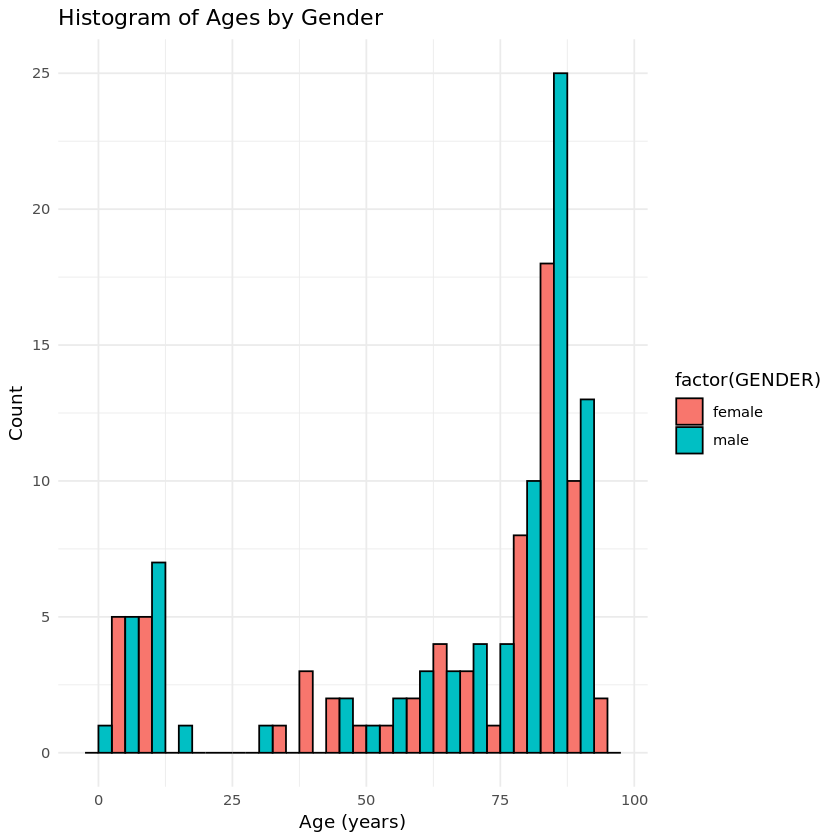

In [15]:
#Question 11
tidied_data <- tidied_data %>%
  mutate(
    AGE = as.numeric(
      difftime(
        if_else(is.na(DEATHDATE), Sys.Date(), DEATHDATE),
        BIRTHDATE,
        units = "days"
      )
    ) %/% 365
  )

ggmd(
  ggplot(tidied_data %>% filter(GENDER %in% c("male", "female")),
         aes(x = AGE, fill = factor(GENDER))) +
    geom_histogram(binwidth = 5, position = "dodge", color = "black") +
    labs(x = "Age (years)", y = "Count", title = "Histogram of Ages by Gender") +
    theme_minimal()
)

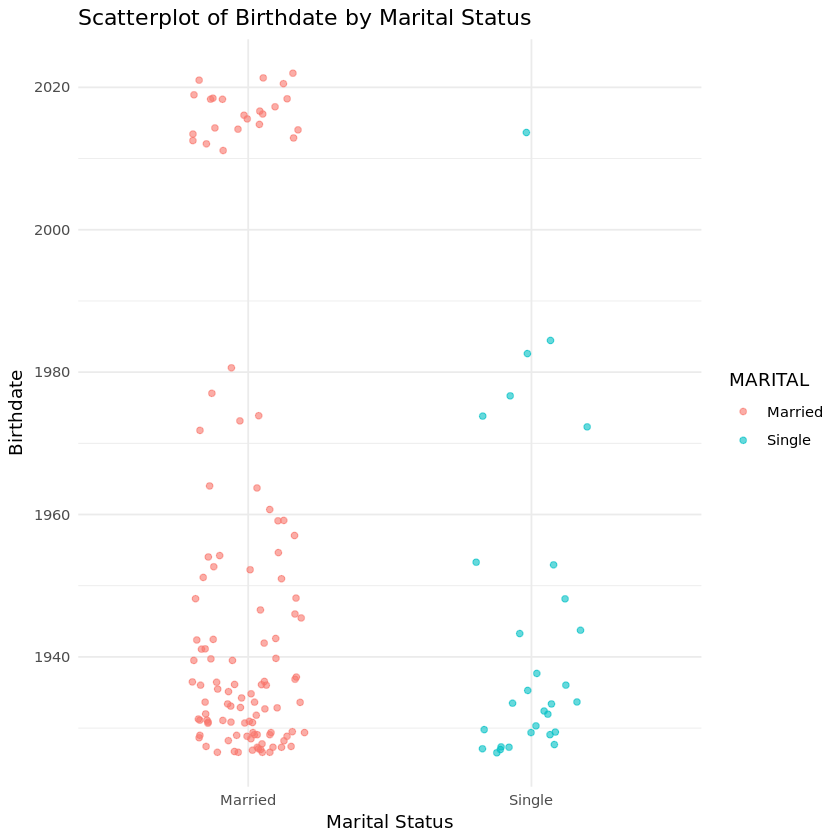

In [16]:
#Question 12
ggmd(
  ggplot(
    tidied_data %>%
      filter(MARITAL %in% c("M", "S")) %>%
      mutate(MARITAL = recode(MARITAL, M = "Married", S = "Single")),
    aes(x = MARITAL, y = BIRTHDATE)
  ) +
    geom_point(aes(color = MARITAL), alpha = 0.6, position = position_jitter(width = 0.2, height = 0)) +
    labs(x = "Marital Status", y = "Birthdate", title = "Scatterplot of Birthdate by Marital Status") +
    theme_minimal()
)